## pretrained models: Word2Vec, FastText, Glove

__사전학습모델 (이거 하나면 끝!)__

- [깃허브 ratsgo/embedding](https://github.com/ratsgo/embedding/releases/tag/v1.0.1)
  - 2019.07 [word-embeddings 다운로드](https://drive.google.com/file/d/1FeGIbSz2E1A63JZP_XIxnGaSRt7AhXFf/view)
  - [한국어 임베딩 튜토리얼](https://ratsgo.github.io/embedding/)

__그 밖에 사전학습모델 (Download)__

- [국민대 자연어처리-Word2Vec,FastText](http://nlp.kookmin.ac.kr/kcc/word2vec/)
  - Word2Vec 다운로드 가능: [word2vec-KCC150](http://203.246.112.71/kcc/word2vec/word2vec-KCC150.tar.gz)
  - FastText 는 다운로드 안됨
  - [임베딩 Demo](http://nlp.kookmin.ac.kr/kcc/word2vec/demo)
- [Glove-kor 100차원 다운로드](http://nlp.stanford.edu/data/glove.6B.zip)
  - 설명 페이지는 못찾았음
- [fasttext.cc Resources](https://fasttext.cc/docs/en/crawl-vectors.html)
  - FastText 다운로드 가능: [cc.ko.300.bin.gz](https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ko.300.bin.gz)
- [깃허브 Kyubyong/wordvectors](https://github.com/Kyubyong/wordvectors)
  - 2016.12 [Korean Word2Vec](https://drive.google.com/open?id=0B0ZXk88koS2KbDhXdWg1Q2RydlU)
  - 2017.02 [Korean FastText](https://www.dropbox.com/s/stt4y0zcp2c0iyb/ko.tar.gz?dl=0)

__참고문서__ 

- Word2Vec
  - [8) 사전 훈련된 워드 임베딩(Pre-trained Word Embedding)](https://wikidocs.net/33793)
  - [자연어처리(NLP) 14일차 (Word2Vec 실습2)](https://omicro03.medium.com/%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC-nlp-14%EC%9D%BC%EC%B0%A8-word2vec-%EC%8B%A4%EC%8A%B52-8e518a358b6c)
- Glove
  - [자연어처리(NLP) 15일차 (GloVe)](https://omicro03.medium.com/%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC-nlp-15%EC%9D%BC%EC%B0%A8-glove-62ecdf424bbd)
- FastText
  - 블로그 [FastText Pre-trained 한국어 모델 사용기](https://inahjeon.dev/fasttext/)

In [ ]:
# 설치전 gensim==3.6.0
!pip install gensim==3.8.3 -U

import gensim
gensim.__version__

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


'3.8.3'

In [ ]:
!cd ~
!pwd
# /content

/content


In [ ]:
!java --version
# openjdk 11.0.15 2022-04-19

!uname -a
# x86_64 GNU/Linux

!curl --version
# curl 7.58.0

openjdk 11.0.15 2022-04-19
OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1)
OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)
Linux 0ed377559f5b 5.4.188+ #1 SMP Sun Apr 24 10:03:06 PDT 2022 x86_64 x86_64 x86_64 GNU/Linux
curl 7.58.0 (x86_64-pc-linux-gnu) libcurl/7.58.0 OpenSSL/1.1.1 zlib/1.2.11 libidn2/2.0.4 libpsl/0.19.1 (+libidn2/2.0.4) nghttp2/1.30.0 librtmp/2.3
Release-Date: 2018-01-24
Protocols: dict file ftp ftps gopher http https imap imaps ldap ldaps pop3 pop3s rtmp rtsp smb smbs smtp smtps telnet tftp 
Features: AsynchDNS IDN IPv6 Largefile GSS-API Kerberos SPNEGO NTLM NTLM_WB SSL libz TLS-SRP HTTP2 UnixSockets HTTPS-proxy PSL 


In [1]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 14.6 MB/s 
     |████████████████████████████████| 453 kB 21.7 MB/s 


### KoNLPy 형태소 분석기 비교 

참고

- [한국어 형태소 분석기 체험 및 비교(Okt, Mecab, Komoran, Kkma)](https://soohee410.github.io/compare_tagger)

#### MeCab

- 잘게 자른다. 매우 빠르다(압도적). C++ 기반. 
- Elasticsearch 의 Nori 토크나이저도 mecab-ko-dic 사전을 사용함

```bash
# MeCab 사전 설치
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
```

#### Okt

- 스테밍 기능이 있다. 적당히 정교하다. 속도도 준수한편
- 트위터에서 만든 오픈소스 한국어 처리기 tweeter-korean-text 사전을 이어받아 만들어짐



In [2]:
# Okt 테스트
from konlpy.tag import Okt
okt = Okt()
print(okt.morphs(u'영등포구청역에 있는 맛집 좀 알려주세요.'))
# ['영등포', '구청', '역', '에', '있는', '맛집', '좀', '알려주세요', '.']
print(okt.nouns(u'우리나라에는 무릎 치료를 잘하는 정형외과가 없는가!'))
# ['우리나라', '무릎', '치료', '정형외과']
print(okt.pos(u'자연주의~ 별로에요 ㅎㅎ ㅠㅠㅠㅠㅜ (쇼핑[몰])은 어떤 곳인가?'))
# [('자연', 'Noun'), ('주의', 'Noun'), ('쇼핑몰', 'Noun'), ('은', 'Josa'), ('어떤', 'Adjective'), ('곳', 'Noun'), ('인가', 'Josa'), ('?', 'Punctuation')]

['영등포', '구청', '역', '에', '있는', '맛집', '좀', '알려주세요', '.']
['우리나라', '무릎', '치료', '정형외과']
[('자연', 'Noun'), ('주의', 'Noun'), ('~', 'Punctuation'), ('별로', 'Noun'), ('에요', 'Josa'), ('ㅎㅎ', 'KoreanParticle'), ('ㅠㅠㅠㅠㅜ', 'KoreanParticle'), ('(', 'Punctuation'), ('쇼핑', 'Noun'), ('[', 'Punctuation'), ('몰', 'Verb'), ('])', 'Punctuation'), ('은', 'Noun'), ('어떤', 'Adjective'), ('곳', 'Noun'), ('인가', 'Josa'), ('?', 'Punctuation')]


In [ ]:
print(okt.pos(u'제품이 별로에요 좋아요 좋아용 조은 좋은 했는데 빠르고 샀는데 하세요 없고 했습니다 좋네요 나빠요', norm=True, stem=True))

[('제품', 'Noun'), ('이', 'Josa'), ('별로', 'Noun'), ('에요', 'Josa'), ('좋다', 'Adjective'), ('좋다', 'Adjective'), ('좋다', 'Adjective'), ('좋다', 'Adjective'), ('하다', 'Verb'), ('빠르다', 'Adjective'), ('사다', 'Verb'), ('하다', 'Verb'), ('없다', 'Adjective'), ('하다', 'Verb'), ('좋다', 'Adjective'), ('나쁘다', 'Adjective')]


## 1. 리뷰 데이터 로딩

In [3]:
from google.colab import drive
drive.mount('/gdrive')

# 파일을 못찾을 경우, 이렇게 확인을 해야 함!!
import os
os.chdir("/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/data")
!ls -l

Mounted at /gdrive
total 52701
-rw------- 1 root root  188900 Jul  7 08:13 sample_submission.csv
-rw------- 1 root root  188888 Jul 25 09:17 submission_v2.csv
-rw------- 1 root root  188889 Jul 25 09:11 submission_v3.csv
-rw------- 1 root root  188889 Jul 25 13:52 submission_v4.csv
-rw------- 1 root root 2679138 Jul  7 08:13 test.csv
-rw------- 1 root root 8288753 Jul 24 11:11 test_mecab.csv
-rw------- 1 root root 7841571 Jul 24 11:35 test_okt.csv
-rw------- 1 root root 7650515 Jul 25 08:57 test_okt_stem.csv
-rw------- 1 root root 2738015 Jul  7 08:13 train.csv
-rw------- 1 root root 8366728 Jul 24 11:09 train_mecab.csv
-rw------- 1 root root 7916589 Jul 24 11:29 train_okt.csv
-rw------- 1 root root 7726432 Jul 25 07:25 train_okt_stem.csv


In [4]:
import pandas as pd

data_path="/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/data"

#csv 형식의 training 데이터를 로드합니다.
train_df = pd.read_csv(f'{data_path}/train.csv')
# test_df = pd.read_csv(f'{data_path}/test.csv')

train_df.head()

,id,reviews,target
0,0,조아요 처음구입 싸게햇어요,2
1,1,생각보다 잘 안돼요 매지 바른지 하루밖에 안됐는데ㅠㅠ 25천원가량 주고 사기 너무 ...,1
2,2,디자인은괜찮은데 상품이 금이가서 교환했는데 두번째받은상품도 까져있고 안쪽에 금이가져...,2
3,3,기전에 이 제품말고 이마트 트레이더스에서만 팔던 프리미엄 제품을 사용했었습니다. 샘...,2
4,4,튼튼하고 손목을 잘 받쳐주네요~,5


In [5]:
# 한글 자모음 찾아보기 ==> 4584
kor_df = train_df[train_df['reviews'].str.count(r'[ㄱ-ㅎ|ㅏ-ㅣ]+')>0]
print('자모음 ==>', len(kor_df))
print(kor_df['reviews'].head())

print('--'*30, end='\n\n')

# 영어 찾아보기 ==> 537
eng_df = train_df[train_df['reviews'].str.count(r'[a-zA-Z]+')>0]
print('영어 ==>', len(eng_df))
print(eng_df['reviews'].head())

print('--'*30, end='\n\n')

# 숫자 찾아보기 ==> 2425
num_df = train_df[train_df['reviews'].str.count(r'[0-9]+')>0]
print('숫자 ==>', len(num_df))
print(num_df['reviews'].head())

print('--'*30, end='\n\n')

# 특수문자 찾아보기 ==> 13360
spc_df = train_df[train_df['reviews'].str.count(r'[\{\}\[\]\/?.,;:|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"]+')>0]
print('특수문자 ==>', len(spc_df))
print(spc_df['reviews'].head())

print('--'*30, end='\n\n')

# 웹주소 찾아보기 ==> 2
num_df = train_df[train_df['reviews'].str.count(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')>0]
print('웹주소 ==>', len(num_df))
print(num_df['reviews'].head())

print('--'*30, end='\n\n')

# 이메일 찾아보기 ==> 0
num_df = train_df[train_df['reviews'].str.count(r'([A-Za-z0-9]+[.-_])*[A-Za-z0-9]+@[A-Za-z0-9-]+(\.[A-Z|a-z]{2,})+')>0]
print('이메일 ==>', len(num_df))
print(num_df['reviews'].head())

print('--'*30, end='\n\n')

# 전화번호 찾아보기 ==> 4
num_df = train_df[train_df['reviews'].str.count(r'0[0-9]{1,2}[-]{0,1}[0-9]{3,4}[-]{0,1}[0-9]{4}')>0]
print('전화번호 ==>', len(num_df))
print(num_df['reviews'].head())


자모음 ==> 4584
1     생각보다 잘 안돼요 매지 바른지 하루밖에 안됐는데ㅠㅠ 25천원가량 주고 사기 너무 ...
2     디자인은괜찮은데 상품이 금이가서 교환했는데 두번째받은상품도 까져있고 안쪽에 금이가져...
15                            다른거는 다만족하는데 나사부분이ㅈ맘엥ㆍㄴ들어서
20                                     강추해요 너무 잘쓰고 있어ㅇᆢ
21    먼지가적다고하는데 전적은지모르겠어요. 극세사라고하던데..어느면이극세사인지도모르겠고요...
Name: reviews, dtype: object
------------------------------------------------------------

영어 ==> 537
105    물건이 잘못왔습니다. 제가주문한건 A3000u 인데 A3000ua 가왔스빈다. 일단...
154                                   px에있는 로카티 제질하고 달라요
189    일단 상품은 좋지 못해요 버튼도 확인 안되서 as전화하니 남직원이 불친절 하네요 돈...
198    분명 ad실내등 주문했는데 md실내등으로 왔네요 뜯고 작업할려니 뭐가안맞아서 보니 ...
244                        옵션추가해서 LED불들어오는걸로구매했는데 불량이네요.
Name: reviews, dtype: object
------------------------------------------------------------

숫자 ==> 2425
1     생각보다 잘 안돼요 매지 바른지 하루밖에 안됐는데ㅠㅠ 25천원가량 주고 사기 너무 ...
5     배송은 먼저 구입하신 분들께서 오래걸린다고 하여 참고 기달렸습니다 생각보다 일찍도착...
39                    좋네요 성인6명이앉기딱일듯요 색상도 괜찮고 다리도 튼튼하네요
42    양념통5개 오일병5개 주문했는데 양념통 뚜껑하나가 스텐마감이 안되어있어서 검지

In [ ]:
train_df.iloc[[9038,14611,15251,24954],1].tolist()

# train_df[ train_df['reviews'].str.match(r'0[0-9]{1,2}[-]{0,1}[0-9]{3,4}[-]{0,1}[0-9]{4}') ]

['문이 정확히 맞지 않아 세게 밀어야 닫히네요. 교환하기 귀찮아서 그냥 씁니다.http://order.pay.naver.com/purchaseReview/201608255472458',
 'vzgshxbbshw yzgshwjvㄷㄱㄷㄱㅈㅂㅈㄱ싱ㅈㅇㄷㅂㄱ디ㅡㅅㅂㅈㄱㄷㅂㅈ43894983494980649487640468',
 '틈이 벌어져서 버블 효과 하나두 없음.. 버블기둥에 용접이 안되서 버블효과가 없어요.. 어떻게 해야하나요..010-6519-9182연락좀 주세요',
 '잘받았습니다 잘받았어요 사이즈는크지만 위아래 높이는 낮아서 큰 해산물은 잘안되네요 ㅜㅜ 그래도가격대비좋아요210381294802148-124-141-9419024']

In [ ]:
# 한글 자모음 제거
train_df['reviews_tmp'] = train_df['reviews'].replace(r'[ㄱ-ㅎ|ㅏ-ㅣ]+', '', regex=True)
# 나중에 제거하기 보다는 먼저 공백으로 치환해 형태소 분석 결과를 더 좋게 만들어 보고자 함!

# 웹주소 제거
train_df['reviews_tmp'] = train_df['reviews_tmp'].replace(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', regex=True)
# 이메일 제거
train_df['reviews_tmp'] = train_df['reviews_tmp'].replace(r'([A-Za-z0-9]+[.-_])*[A-Za-z0-9]+@[A-Za-z0-9-]+(\.[A-Z|a-z]{2,})+', '', regex=True)
# 전화번호 제거
train_df['reviews_tmp'] = train_df['reviews_tmp'].replace(r'0[0-9]{1,2}[-]{0,1}[0-9]{3,4}[-]{0,1}[0-9]{4}', '', regex=True)

In [ ]:
train_df['mrp_tokens'] = train_df['reviews_tmp'].apply(
    lambda s: ' '.join(okt.morphs( s ))
    )

In [ ]:
# Okt 의 태그셋
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [ ]:
# Okt 품사 태그 
# https://datascienceschool.net/03%20machine%20learning/03.01.02%20KoNLPy%20%ED%95%9C%EA%B5%AD%EC%96%B4%20%EC%B2%98%EB%A6%AC%20%ED%8C%A8%ED%82%A4%EC%A7%80.html

except_tags = ['Unknown','ScreenName','Hashtag', 'Josa','Eomi','Exclamation','Punctuation','KoreanParticle', 'Foreign','Alpha','Number']
pos_tagging = lambda tagger, s: [pos[0] for pos in tagger.pos(s, norm=True, stem=True) if pos[1] not in except_tags] 

train_df['pos_tokens'] = train_df['reviews_tmp'].apply(
    lambda s: ' '.join(pos_tagging(okt, s))
    )

In [ ]:
# 토큰수
train_df['mrp_tsize'] = train_df['mrp_tokens'].apply(lambda s: len(s.split()))
train_df['pos_tsize'] = train_df['pos_tokens'].apply(lambda s: len(s.split()))

# 공백 제외 글자수
import re
train_df['pos_csize'] = train_df['pos_tokens'].apply(lambda s: len(re.findall(r'\S',s)) )

# 토큰 1개짜리 리뷰 ==> 필터링 (26, 104, 16)
print(len(train_df[train_df['mrp_tsize']==1]), len(train_df[train_df['pos_tsize']==1]), len(train_df[train_df['pos_csize']==1]))
# pos_tokens 토큰수 2 이상?
train_df[(train_df['pos_csize']==1) | (train_df['pos_tsize']==1) & (train_df['mrp_tsize']==2)].head(20)

33 118 16


,id,reviews,target,reviews_tmp,mrp_tokens,pos_tokens,mrp_tsize,pos_tsize,pos_csize
195,195,가벼워요@@!@,5,가벼워요@@!@,가벼워요 @@!@,가볍다,2,1,3
672,672,만족합니당~,5,만족합니당~,만족합니당 ~,만족하다,2,1,4
1214,1214,별로........,1,별로........,별로 ........,별로,2,1,2
1278,1278,재구매 dsdadsadsadsadsadsadsadsa,2,재구매 dsdadsadsadsadsadsadsadsa,재구매 dsdadsadsadsadsadsadsadsa,재다,2,1,2
1933,1933,만족도 200%,5,만족도 200%,만족도 200%,만족도,2,1,3
2516,2516,별로여ㅋㅋㅋ,2,별로여,별로 여,별로,2,1,2
4134,4134,앗있어요^^,2,앗있어요^^,앗있어요 ^^,앗다,2,1,2
4516,4516,평범해요.,2,평범해요.,평범해요 .,평범하다,2,1,4
4705,4705,별로에요 ㅠㅠ,2,별로에요,별로 에요,별로,2,1,2
4817,4817,잘쓰고있습니다%~~,5,잘쓰고있습니다%~~,잘쓰고있습니다 %~~,잘쓰다,2,1,3


In [ ]:
# 한글자 카운트 정렬 ==> '굿' 외에는 쓸게 없다
train_df[train_df['pos_csize']==1].groupby('pos_tokens')['id'].nunique().sort_values(ascending=False).reset_index(name='count')

,pos_tokens,count
0,굿,3
1,로,2
2,근,1
3,레,1
4,묘,1
5,뭡,1
6,므,1
7,부,1
8,요,1
9,이,1


In [ ]:
stat_dict = train_df['pos_tsize'].value_counts().to_dict()
min_x, max_x = min(stat_dict.keys()), max(stat_dict.keys())

x_values = list(range(min_x, max_x+1))
y_values = [stat_dict.get(x,0) for x in x_values]
print(min_x, max_x, '=>',x_values)
print(y_values)
print()
train_df['pos_tsize'].describe()

0 54 => [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]
[3, 118, 535, 1531, 2361, 2414, 2182, 1792, 1421, 1204, 1101, 864, 827, 763, 671, 624, 603, 595, 541, 477, 443, 406, 341, 342, 293, 287, 269, 247, 233, 194, 172, 154, 160, 133, 138, 106, 87, 95, 68, 50, 44, 37, 27, 14, 13, 6, 6, 2, 1, 2, 0, 1, 0, 1, 1]



count    25000.000000
mean        11.645560
std          8.576582
min          0.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         54.000000
Name: pos_tsize, dtype: float64

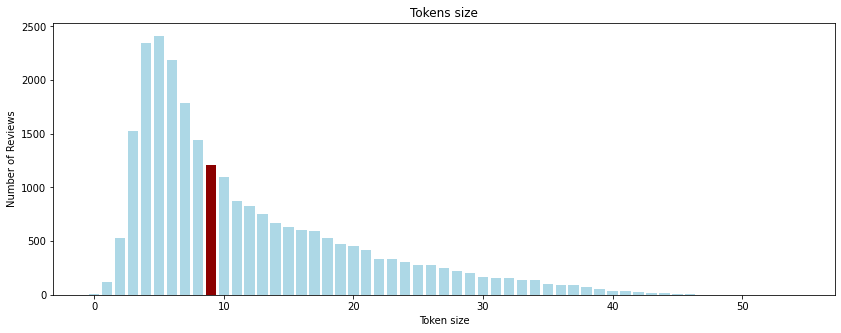

In [ ]:
import matplotlib.pyplot as plt

# 중간값(9)만 빨간색
colors = [ 'lightblue' if x != 9 else 'darkred' for x in x_values ]

plt.figure(figsize = (14, 5))
plt.bar(x_values, y_values, color=colors)
plt.title("Tokens size")
plt.xlabel("Token size")
plt.ylabel("Number of Reviews")
plt.show()

In [ ]:
import numpy as np

# 공백을 NaN 으로
train_df = train_df.replace(r'^\s*$', np.NaN, regex=True)
# NaN 확인 (pos_tokens=3)
print('count NaN:', train_df.isna().sum(), end='\n\n' )
# NaN 포함열 삭제
train_df = train_df.dropna()

# 한글자 pos_tokens 확인 (pos_tokens=13)
print('count 1-char:', len(train_df[ (train_df['pos_csize']==1) & ~(train_df['pos_tokens'].str.contains('굿')) ]), end='\n\n' )
# 한글자 pos_tokens 포함열 삭제 (단, '굿' 제외)
train_df = train_df.drop( train_df[ (train_df['pos_csize']==1) & ~(train_df['pos_tokens'].str.contains('굿')) ].index )

# ==> 모두 17행 제거

count NaN: id             0
reviews        0
target         0
reviews_tmp    0
mrp_tokens     0
pos_tokens     3
mrp_tsize      0
pos_tsize      0
pos_csize      0
dtype: int64

count 1-char: 13



In [ ]:
# 불필요한 컬럼 제거
train_df = train_df.drop(['reviews_tmp'], axis='columns')

In [ ]:
# 24981 rows × 8 columns
train_df

,id,reviews,target,mrp_tokens,pos_tokens,mrp_tsize,pos_tsize,pos_csize
0,0,조아요 처음구입 싸게햇어요,2,조아요 처음 구입 싸게 햇 어 요,좋다 처음 구입 싸다 하다,7,5,10
1,1,생각보다 잘 안돼요 매지 바른지 하루밖에 안됐는데ㅠㅠ 25천원가량 주고 사기 너무 ...,1,생각 보다 잘 안 돼요 매지 바른지 하루 밖에 안 됐는데 25천원 가량 주고 사기 ...,생각 자다 안 돼다 매다 바르다 하루 안 돼다 주다 사기 너무 아깝다,17,13,26
2,2,디자인은괜찮은데 상품이 금이가서 교환했는데 두번째받은상품도 까져있고 안쪽에 금이가져...,2,디자인 은 괜찮은데 상품 이 금 이 가서 교환 했는데 두번째 받은 상품 도 까져있고...,디자인 괜찮다 상품 금 가다 교환 하다 두번째 받다 상품 끄다 안쪽 금 가다 귀찮다...,28,21,46
3,3,기전에 이 제품말고 이마트 트레이더스에서만 팔던 프리미엄 제품을 사용했었습니다. 샘...,2,기전 에 이 제품 말고 이마트 트 레이더스 에서만 팔던 프리미엄 제품 을 사용 했었...,기전 이 제품 이마트 트 레이더스 파다 프리미엄 제품 사용 하다 샘플 써다 보고 마...,53,39,82
4,4,튼튼하고 손목을 잘 받쳐주네요~,5,튼튼하고 손목 을 잘 받쳐주네요 ~,튼튼하다 손목 자다 받치다,6,4,11
...,...,...,...,...,...,...,...,...
24995,24995,일단향이너무너무좋은데지속력만좋다면좋겠지만..워낙저렴해그래도좋아여,5,일단 향 이 너무 너무 좋은데 지속 력 만 좋다면 좋겠지만 .. 워낙 저렴해 그래도...,일단 향 너무 너무 좋다 지속 력 좋다 좋다 워낙 저렴하다 그래도좋아,16,12,27
24996,24996,동일한 업체에서 발송하고 한 상자로 배송되었는데 택배비는 이중 처리되었습니다.,2,동일한 업체 에서 발송 하고 한 상자 로 배송 되었는데 택배 비는 이중 처리 되었습...,동일하다 업체 발송 하다 상자 배송 되어다 택배 비다 이중 처리 되어다,16,12,28
24997,24997,향이 좋아요!! 다른 향도 시켜보고 싶어요,4,향 이 좋아요 !! 다른 향 도 시켜 보고 싶어요,향 좋다 다른 향 시키다 보고 싶다,10,7,13
24998,24998,펼쳐보니 끝부분쯤에 50cm정도 찟어져 있습니다 날짜관계로 구냥 사용합니다,2,펼쳐 보니 끝 부분 쯤 에 50 cm 정도 찟어져 있습니다 날짜 관계 로 구 냥 사...,펼치다 보다 끝 부분 쯤 정도 찟어져 있다 날짜 관계 구 사용 하다,18,13,25


In [ ]:
import pandas as pd

data_path="/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/data"

# 전처리 된 csv 저장
# - index=False 안하면, `unnamed:0` 컬럼 생성됨
train_df.to_csv(data_path+'/train_okt_stem.csv', index=False, encoding='utf-8')

#### 2) TEST 데이터 전처리

TRAIN 데이터와 동일 작업 수행

In [ ]:
import pandas as pd

data_path="/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/data"

#csv 형식의 training 데이터를 로드합니다.
test_df = pd.read_csv(f'{data_path}/test.csv')

test_df
# 25000 rows × 2 columns

,id,reviews
0,0,채소가 약간 시들어 있어요
1,1,발톱 두껍고 단단한 분들 써도 소용없어요 이 테이프 물렁거리고 힘이없어서 들어 올리...
2,2,부들부들 좋네요 입어보고 시원하면 또 살게요
3,3,이런 1. 8 골드 주라니깐 파란개 오네 회사전화걸어도 받지도 않고 머하자는거임?
4,4,검수도 없이 보내구 불량 배송비 5000원 청구하네요 완전별로 별하나도 아까워요
...,...,...
24995,24995,사용해보니 좋아요~^^
24996,24996,저렴한가격에. 질좋고. 핏좋고. 너무. 이쁘게. 입고다녀요..
24997,24997,세트상품이라고 써있어서 그런줄 알고 구매했더니 단품이었네요 낚인 느낌도 들고 그러네...
24998,24998,역시 로네펠트!! 좋아요.


In [ ]:
# 한글 자모음 제거
test_df['reviews_tmp'] = test_df['reviews'].replace(r'[ㄱ-ㅎ|ㅏ-ㅣ]+', '', regex=True)

# 웹주소 제거
test_df['reviews_tmp'] = test_df['reviews_tmp'].replace(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', regex=True)
# 이메일 제거
test_df['reviews_tmp'] = test_df['reviews_tmp'].replace(r'([A-Za-z0-9]+[.-_])*[A-Za-z0-9]+@[A-Za-z0-9-]+(\.[A-Z|a-z]{2,})+', '', regex=True)
# 전화번호 제거
test_df['reviews_tmp'] = test_df['reviews_tmp'].replace(r'0[0-9]{1,2}[-]{0,1}[0-9]{3,4}[-]{0,1}[0-9]{4}', '', regex=True)

# Okt 토크나이징
test_df['mrp_tokens'] = test_df['reviews_tmp'].apply(
    lambda s: ' '.join(okt.morphs( s ))
    )

# Okt 품사 태그 (train 부분에서 정의)
except_tags = ['Unknown','ScreenName','Hashtag', 'Josa','Eomi','Exclamation','Punctuation','KoreanParticle', 'Foreign','Alpha','Number']
pos_tagging = lambda tagger, s: [pos[0] for pos in tagger.pos(s, norm=True, stem=True) if pos[1] not in except_tags] 

test_df['pos_tokens'] = test_df['reviews_tmp'].apply(
    lambda s: ' '.join(pos_tagging(okt, s))
    )

# 토큰수
test_df['mrp_tsize'] = test_df['mrp_tokens'].apply(lambda s: len(s.split()))
test_df['pos_tsize'] = test_df['pos_tokens'].apply(lambda s: len(s.split()))

# 공백 제외 글자수
import re
test_df['pos_csize'] = test_df['pos_tokens'].apply(lambda s: len(re.findall(r'\S',s)) )

# 공백을 NaN 으로
import numpy as np
test_df = test_df.replace(r'^\s*$', np.NaN, regex=True)
# NaN 확인 (pos_tokens=4)
print('count NaN:', test_df.isna().sum(), end='\n\n' )
# NaN 포함열 삭제
test_df = test_df.dropna()

# 한글자 pos_tokens 확인 (pos_tokens=7)
print('count 1-char:', len(test_df[ (test_df['pos_csize']==1) & ~(test_df['pos_tokens'].str.contains('굿')) ]), end='\n\n' )
# 한글자 pos_tokens 포함열 삭제 (단, '굿' 제외)
test_df = test_df.drop( test_df[ (test_df['pos_csize']==1) & ~(test_df['pos_tokens'].str.contains('굿')) ].index )

# ==> 모두 11행 제거


# 불필요한 컬럼 제거
test_df = test_df.drop(['reviews_tmp'], axis='columns')

# 24989 rows × 7 columns
test_df

count NaN: id             0
reviews        0
reviews_tmp    0
mrp_tokens     0
pos_tokens     4
mrp_tsize      0
pos_tsize      0
pos_csize      0
dtype: int64

count 1-char: 7



,id,reviews,mrp_tokens,pos_tokens,mrp_tsize,pos_tsize,pos_csize
0,0,채소가 약간 시들어 있어요,채소 가 약간 시들어 있어요,채소 약간 시들다 있다,5,4,9
1,1,발톱 두껍고 단단한 분들 써도 소용없어요 이 테이프 물렁거리고 힘이없어서 들어 올리...,발톱 두껍고 단단한 분들 써도 소용없어요 이 테이프 물렁거리 고 힘 이 없어서 들어...,발톱 두껍다 단단하다 분들 써다 소용없다 이 테이프 물렁거리 힘 없다 들다 올리다 ...,24,21,50
2,2,부들부들 좋네요 입어보고 시원하면 또 살게요,부들부들 좋네요 입어보고 시원하면 또 살게요,부들부들 좋다 입어보다 시원하다 또 살다,6,6,17
3,3,이런 1. 8 골드 주라니깐 파란개 오네 회사전화걸어도 받지도 않고 머하자는거임?,이런 1 . 8 골드 주 라니깐 파란 개 오네 회사 전화 걸어도 받지도 않고 머 하...,이렇다 골드 주 파란 개 오다 회사 전화 걸다 받다 않다 머 하다 임,19,14,25
4,4,검수도 없이 보내구 불량 배송비 5000원 청구하네요 완전별로 별하나도 아까워요,검수 도 없이 보내구 불량 배송비 5000원 청구 하네요 완전 별로 별하나 도 아까워요,검수 없이 보내다 불량 배송비 청구 하다 완전 별로 별하나 아깝다,14,11,26
...,...,...,...,...,...,...,...
24995,24995,사용해보니 좋아요~^^,사용 해보니 좋아요 ~^^,사용 해보다 좋다,4,3,7
24996,24996,저렴한가격에. 질좋고. 핏좋고. 너무. 이쁘게. 입고다녀요..,저렴한 가격 에 . 질 좋고 . 핏좋 고 . 너무 . 이쁘게 . 입고 다녀요 ..,저렴하다 가격 질 좋다 핏좋 너무 이쁘다 입다 다니다,17,9,21
24997,24997,세트상품이라고 써있어서 그런줄 알고 구매했더니 단품이었네요 낚인 느낌도 들고 그러네...,세트 상품 이라고 써있어서 그런줄 알 고 구매 했더니 단 품 이었네요 낚 인 느낌 ...,세트 상품 써다 그렇다 알 구매 하다 단 품 이다 낚 느낌 들다 그렇다 딘품 표시 ...,40,31,55
24998,24998,역시 로네펠트!! 좋아요.,역시 로 네 펠트 !! 좋아요 .,역시 로 네 펠트 좋다,7,5,8


In [ ]:
import pandas as pd

data_path="/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/data"

# 전처리 된 csv 저장
# - index=False 안하면, `unnamed:0` 컬럼 생성됨
test_df.to_csv(data_path+'/test_okt_stem.csv', index=False, encoding='utf-8')